<a href="https://colab.research.google.com/github/Kib3Gabriel/Intro-to-Neural-Network/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural Network:

Download dataset Dataset is already splitted into training and testing.
Preprocess both train and test dataset
Build the model train the model validate the model using test dataset.

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist   #load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()    #split into train and test

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0,23,23]   #looking at one pixel

194

gray scale images

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_labels[:10]    #first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

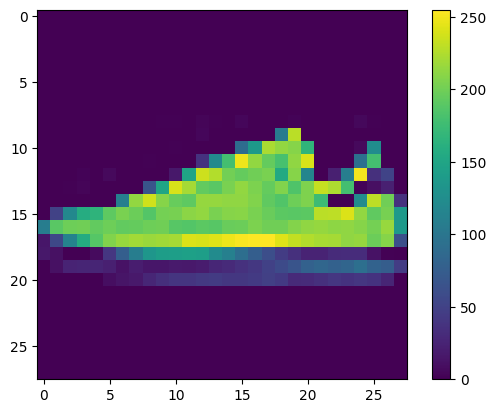

In [ ]:
#Display images

plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

# Data Preprocessing

In [ ]:
 #Normalizing
 train_images = train_images / 255.0

 test_images = test_images / 255.0

In [ ]:
#Building Model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #input layer    flattens 784 pixels
    keras.layers.Dense(128, activation='relu'),   #hidden layer
    keras.layers.Dense(10, activation='softmax')   #output layer
])

In [ ]:
#compile the model

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',       #loss function, how far is the output from the actual expected output
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs = 15, verbose=2)

Epoch 1/15
1875/1875 - 8s - loss: 0.4972 - accuracy: 0.8244 - 8s/epoch - 4ms/step
Epoch 2/15
1875/1875 - 6s - loss: 0.3729 - accuracy: 0.8658 - 6s/epoch - 3ms/step
Epoch 3/15
1875/1875 - 7s - loss: 0.3349 - accuracy: 0.8773 - 7s/epoch - 4ms/step
Epoch 4/15
1875/1875 - 5s - loss: 0.3105 - accuracy: 0.8864 - 5s/epoch - 3ms/step
Epoch 5/15
1875/1875 - 7s - loss: 0.2923 - accuracy: 0.8935 - 7s/epoch - 4ms/step
Epoch 6/15
1875/1875 - 6s - loss: 0.2774 - accuracy: 0.8980 - 6s/epoch - 3ms/step
Epoch 7/15
1875/1875 - 7s - loss: 0.2659 - accuracy: 0.9008 - 7s/epoch - 4ms/step
Epoch 8/15
1875/1875 - 6s - loss: 0.2568 - accuracy: 0.9054 - 6s/epoch - 3ms/step
Epoch 9/15
1875/1875 - 7s - loss: 0.2458 - accuracy: 0.9081 - 7s/epoch - 4ms/step
Epoch 10/15
1875/1875 - 6s - loss: 0.2392 - accuracy: 0.9113 - 6s/epoch - 3ms/step
Epoch 11/15
1875/1875 - 7s - loss: 0.2303 - accuracy: 0.9139 - 7s/epoch - 3ms/step
Epoch 12/15
1875/1875 - 6s - loss: 0.2235 - accuracy: 0.9162 - 6s/epoch - 3ms/step
Epoch 13/15
1

In [ ]:
#Testing the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)   #verbose = how you want to see your testing process. can be 0, 1,2

print("Test accuracy:",   test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3369 - accuracy: 0.8893
Test accuracy: 0.8892999887466431


In [ ]:
predictions= model.predict(test_images)

print(predictions[0])


313/313 [==============================] - 1s 3ms/step
[4.1245458e-11 7.9240932e-15 3.5385369e-12 3.4084108e-14 2.2525881e-12
 5.7338144e-05 3.6426789e-10 1.7913166e-03 3.5495166e-11 9.9815142e-01]


9
Ankle boot


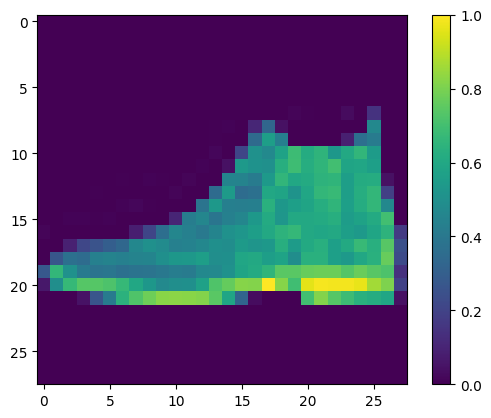

In [ ]:
#show the class index, of the class with high possibility
print(np.argmax(predictions[0]))

#Show the class name with the highest prossibility
print(class_names[np.argmax(predictions[0])])

plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


Pick a number: 12
1/1 [==============================] - 0s 63ms/step
Predicted: Sandal
Expected: Sneaker


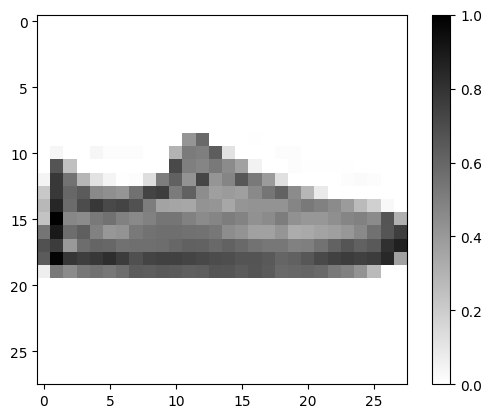

In [ ]:
#Verifying predictions

COLOR ='white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(models, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class =  class_names[np.argmax(prediction)]

  print(f"Predicted: {predicted_class}")
  print(f"Expected: {class_names[correct_label]}")


  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, class_names, predicted_class):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 < num <=1000:
        return int(num)

      else:
        print("Try again ..")

num = get_number()
image = test_images[num]    #will find the image in the test dataset
label = test_labels[num]    #find the label in the test dataset
predict(model, image, label)  #make prediction from the model

In [ ]:
10

10